In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score

In [2]:
df = pd.read_csv("C:\\Users\\arups\\OneDrive\\Desktop\\COLLECTION\\PROGRAMS\\TEST_CSVs\\train.csv" , usecols = ['Age' , 'Fare' , 'Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [3]:
df['Age'].fillna(df['Age'].mean() , inplace = True)

In [4]:
X_train , X_test , y_train , y_test = train_test_split(df.drop('Survived' , axis = 1) , df['Survived'] , random_state = 42 , test_size = 0.2) 

C:\Users\arups\AppData\Local\Temp\ipykernel_17304\1759249887.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


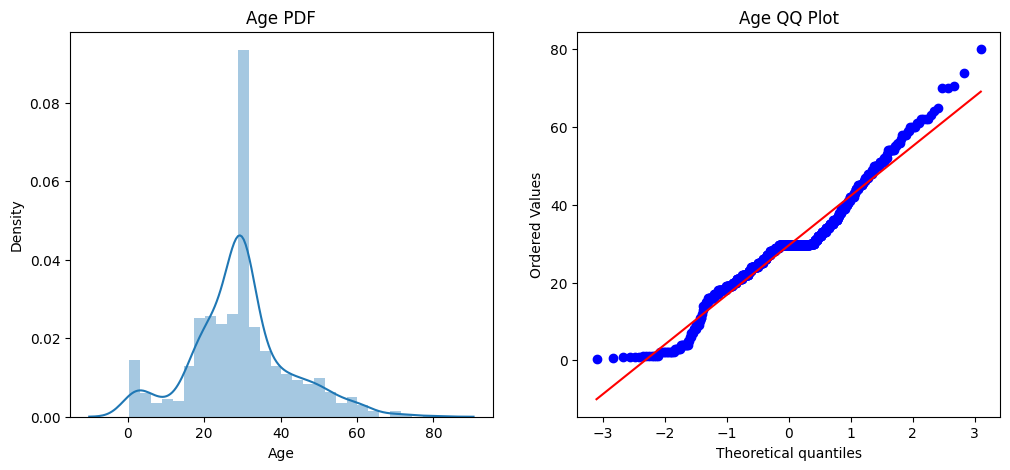

In [5]:

plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

ax = plt.subplot(122)
stats.probplot(X_train['Age'], plot=plt)
plt.title('Age QQ Plot')

plt.show()



C:\Users\arups\AppData\Local\Temp\ipykernel_17304\3558894854.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


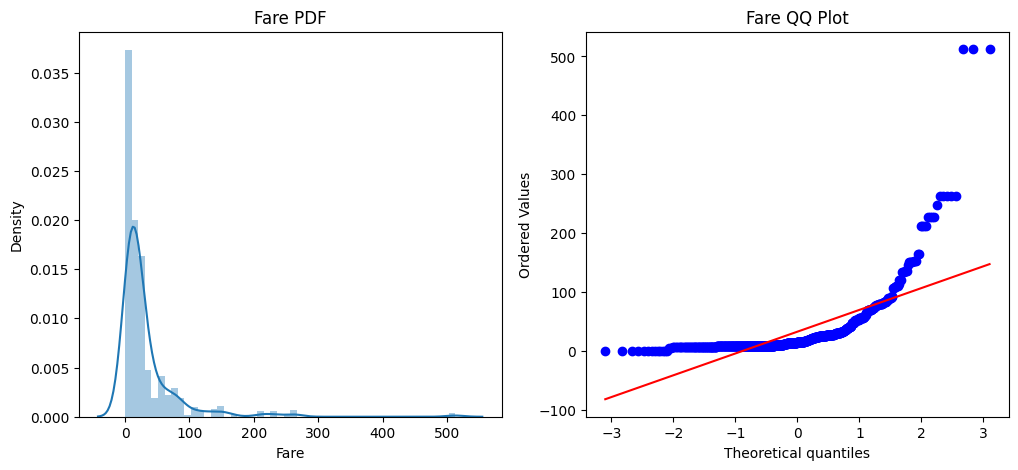

In [6]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

ax = plt.subplot(122)
stats.probplot(X_train['Fare'], plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [7]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [8]:
clf.fit(X_train , y_train)
clf2.fit(X_train , y_train)

DecisionTreeClassifier()

In [9]:
y_pred_lr = clf.predict(X_test)
y_pred_dt = clf2.predict(X_test)

print('Accuracy Score of LR :', accuracy_score(y_test , y_pred_lr))
print('Accuracy Score of DT :', accuracy_score(y_test , y_pred_dt))

Accuracy Score of LR : 0.6480446927374302
Accuracy Score of DT : 0.6703910614525139


### log transformation is typically suitable for data that is right-skewed or positively skewed.
### Box-Cox transformation is typically suitable for data that is right-skewed or positively skewed.

In [10]:
trf = FunctionTransformer(func = np.log1p) 
# log1p because,
# If u have value = 0 then log(0) gives u error
# log1p adds 1 to ur value (0+1) = 1 then log(1); by doing this it will reduce the chance of error

In [11]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [12]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()
clf.fit(X_train_transform , y_train)
clf2.fit(X_train_transform , y_train)
y_pred_lr = clf.predict(X_test_transform)
y_pred_dt = clf2.predict(X_test_transform)

print('Accuracy Score of LR :', accuracy_score(y_test , y_pred_lr)) # Note After  applying transformation LR score has improved
print('Accuracy Score of DT :', accuracy_score(y_test , y_pred_dt)) # But the DT does not effect much

Accuracy Score of LR : 0.6815642458100558
Accuracy Score of DT : 0.6871508379888268


In [13]:
X = df[['Age' , 'Fare']]
y = df[['Survived']]

In [14]:
# After LR accuracy_score has improved just check if i calculate 
# for 10 times the accuracy_score the mean of these scores remain same or not ?

X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed, y.values.ravel(), scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed, y.values.ravel(), scoring='accuracy', cv=10)))

# y.values.ravel() :without '.values.ravel()' DataConversionWarning: A column-vector y was passed when a 1d array was expected.

LR 0.678027465667915
DT 0.6599625468164795


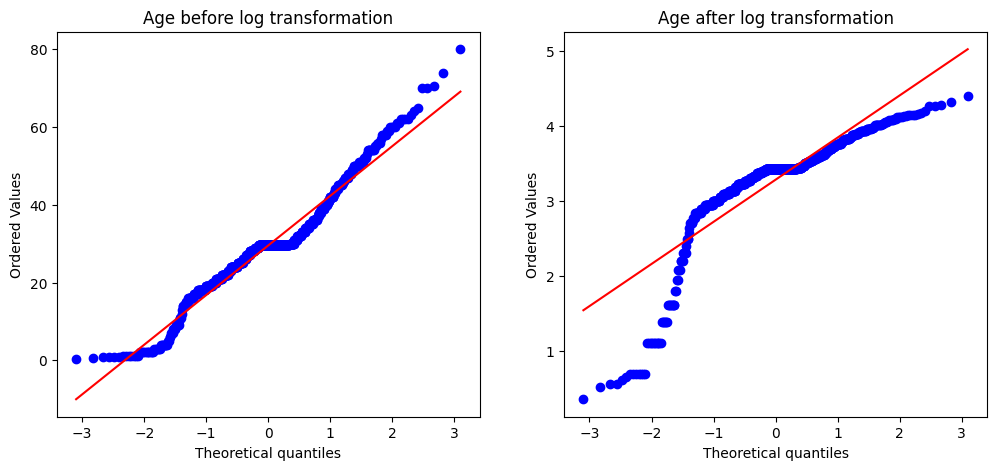

In [15]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
stats.probplot(X_train['Age'], dist = 'norm', plot=plt)
plt.title('Age before log transformation')

ax = plt.subplot(122)
stats.probplot(X_train_transform['Age'], dist = 'norm', plot=plt)
plt.title('Age after log transformation')

plt.show()

In [19]:
trf = ColumnTransformer(transformers = [
    ('log' , FunctionTransformer(func = np.log1p) , ['Fare'])
] , remainder = 'passthrough')

In [20]:
X_train_transform = trf.fit_transform(X_train)
X_test_transform = trf.transform(X_test)

In [22]:
clf = LogisticRegression()
clf2= DecisionTreeClassifier()

clf.fit(X_train_transform , y_train)
clf2.fit(X_train_transform , y_train)

y_pred_lr = clf.predict(X_test_transform)
y_pred_dt = clf2.predict(X_test_transform)

print('LR :' , accuracy_score(y_pred_lr , y_test))
print('DT :' , accuracy_score(y_pred_dt , y_test))

LR : 0.6703910614525139
DT : 0.6927374301675978


In [28]:
X_transformed = trf.fit_transform(X)
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print('LR', np.mean(cross_val_score(clf, X_transformed, y.values.ravel(), scoring='accuracy', cv=10)))
print('DT', np.mean(cross_val_score(clf2, X_transformed, y.values.ravel(), scoring='accuracy', cv=10)))

LR 0.6712609238451936
DT 0.6577028714107366


In [32]:
X_transformed[: , 1]

array([22.        , 38.        , 26.        , 35.        , 35.        ,
       29.69911765, 54.        ,  2.        , 27.        , 14.        ,
        4.        , 58.        , 20.        , 39.        , 14.        ,
       55.        ,  2.        , 29.69911765, 31.        , 29.69911765,
       35.        , 34.        , 15.        , 28.        ,  8.        ,
       38.        , 29.69911765, 19.        , 29.69911765, 29.69911765,
       40.        , 29.69911765, 29.69911765, 66.        , 28.        ,
       42.        , 29.69911765, 21.        , 18.        , 14.        ,
       40.        , 27.        , 29.69911765,  3.        , 19.        ,
       29.69911765, 29.69911765, 29.69911765, 29.69911765, 18.        ,
        7.        , 21.        , 49.        , 29.        , 65.        ,
       29.69911765, 21.        , 28.5       ,  5.        , 11.        ,
       22.        , 38.        , 45.        ,  4.        , 29.69911765,
       29.69911765, 29.        , 19.        , 17.        , 26.  

In [36]:
def apply_transform(transform):
    X = df.iloc[: , 1:3]
    y = df.iloc[: , 0]
    
    trf = ColumnTransformer(transformers = [
        ('log' , FunctionTransformer(func = transform) , ['Fare']) # For memorizing FunctionTransformer(func = f(X^2))
    ] , remainder = 'passthrough')
    
    X_transformed = trf.fit_transform(X)
    clf = LogisticRegression()
    print('Accuracy Score is ', np.mean(cross_val_score(clf , X_transformed , y.values.ravel() , scoring = 'accuracy' , cv=10)))
    
    plt.figure(figsize = (14,4))
    plt.subplot(121)
    stats.probplot(X['Fare'] , dist = 'norm' , plot = plt)
    plt.title('Before log transformation')
    plt.subplot(122)
    stats.probplot(X_transformed[:, 1] , dist = 'norm' , plot = plt)
    plt.title('After log transformation')
    plt.show()

Accuracy Score is  0.6442446941323345


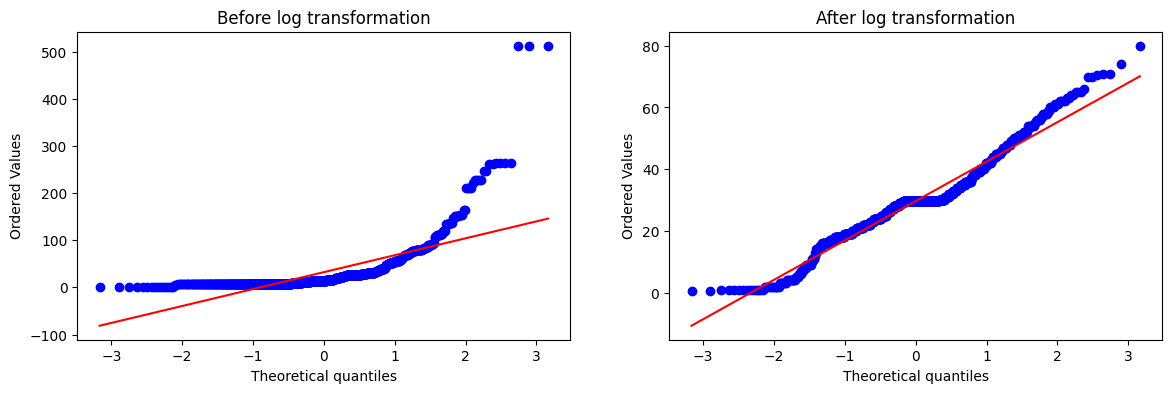

In [37]:
apply_transform(lambda X : X**2) #in lambda X , X is an argument
#  the func parameter of the FunctionTransformer in the ColumnTransformer is expecting a callable function or None, but it received a DataFrame instead if u use only transform = X**2.